# Radon Transform
In classical tomography the projections gathered from a sample represent a Radon transform of the mass density function.\

Module Imports

In [215]:
import numpy as np
from PIL import Image

Implementation:

In [225]:
# Function for comuputing the Radon transform. Takes an image representing a density function in 2d space and an integer defining the number of angles to make measurements.
# Returns the result in the form of a sinograph.
def RadonTransform(fileName, samples):

    sinograph = [[]]

    # Opens image and converts to greyscale throwing out the alpha channel.
    # This will represent a 2d density function.
    img = Image.open(fileName).convert('L') 

    # Scales the image so it takes values from 0-1 with 0 being transparent and 1 being opaque.
    img = Image.eval(img, (lambda x: x/256))

    # Make the image square and of even dimensions
    if (img.width != img.height):
        if (img.width < img.height):
            img = img.crop([0, 0, img.height, img.height])
        else:
            img = img.rop([0, 0, img.width, img.width])

    if (img.width % 2 != 0):
        img = img.crop([0, 0, img.width + 1, img.width + 1])

    # Generate the sinograph
    for i, theta in enumerate(np.arange(0, 180, 180/samples)):
        imgPrime = img.rotate(theta)
        for x in range(img.width):
            sum = 0
            for y in range(img.height):
                sum += imgPrime.getpixel((x,y))

            sinograph[i].append(sum)

        sinograph.append([])

    return(sinograph)


def InvRadonTransform(sinograph):
    img = [[]]
    for y in range(0,256):
        for x in range(0, 256):
            sum = 0
            for t in range(0, 180):
                if int(x*np.cos(t*(2*np.pi/360)) + y*np.sin(t*(2*np.pi/360))) <= 256:
                    sum += sinograph[int(x*np.cos(t*(2*np.pi/360)) + y*np.sin(t*(2*np.pi/360)))][t]
            img[y].append(int(sum/128))

        img.append([]) 

    return(img)



A test image

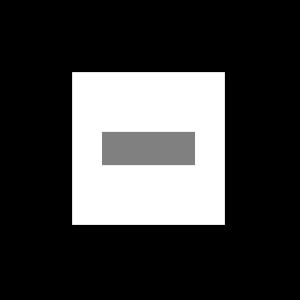

In [217]:
with Image.open("box.png").convert('L') as img: # Opens image and converts to greyscale throwing out alpha channel.
    pxl = img.load() # Loads image so pixels can be accessed.

display(img) # Display the opened image.

Its Radon transform. A sinograph which simulates the measurements which would be recovered during a tomographic scan.

In [218]:
result = RadonTransform("box.png", 360)
result.pop()
img2 = Image.fromarray(np.array(result))
#img2 = Image.eval(img2, lambda x: 5*x)
img2.show()
#display(img2)

Its inverse Radon transform

In [226]:
result2 = InvRadonTransform(result)

In [227]:
result2.pop()

img3 = Image.fromarray(np.array(result2))
img3.show()

In [221]:
import numpy as np
from PIL import Image

# Bresenham's line algorithm for approximating a line between two points on a discete grid.
# Psudo-code can be found at https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm.
def BresenhamLine(x0, y0, x1, y1):
    points = []

    dx = x1 - x0
    dy = y1 - y0
    yi = 1

    if dy < 0:
        yi = -1
        dy = -dy
    
    D = (2*dy) - dx
    y = y0

    for x in range(x0, x1+1):

        points.append((x,y))

        if D > 0:
            y += yi
            D += (2*(dy-dx))
        else:
            D += 2*dy

    return points

def radonTransform(fileName, samples):
    
    with Image.open(fileName).convert('L') as img: # Opens image and converts to greyscale throwing out alpha channel.
        pxl = img.load() # Loads image so pixels can be accessed.

    height = img.height
    width = img.width
    thetas =  np.linspace(0.0, 2.0*3.14, samples, False)

    sinograph = np.zeros((np.size(thetas), max(height,width)))

    for i, theta in enumerate(thetas):
        for j, s in enumerate(range(max(height, width))):

            sum = 0
            for z in range(max(height, width)):
                x = int(z*np.sin(theta) + s*np.cos(theta))
                y = int(-z*np.cos(theta) + s*np.sin(theta))
                
                try:
                    sum += pxl[x, y]
                except IndexError:
                    sum += 0

        sinograph[i, j] = sum

    return(sinograph)

def invRadonTransform(fileName):

    img = Image.open(fileName)
    height = img.height
    width = img.width